In [29]:
import Functions

In [30]:
import matplotlib.pyplot as plt

This implementation of TSP has a few settings that can be changed for how changes are done over generations:
- pop_size: The number of different paths that are kept in memory that can be selected (variable is over graph)
- gen_size: Number of generations to iterate over
- run_size: Number of runs where each run has a different starting population (each run goes through gen_size iterations)
- selection_size: When selecting parents to move on to the next generation's population, selection_size different paths will be compared (until pop_size amount)
- mut_chance: % Chance that a parent selected will be mutated with whatever the selected mutation is before being put in the new generation's population
- cross_chance: % chance that the parents will have whatever the selected crossover is before being put in the new generation's population
- shuffle: True/False for if the mutation should be the shuffle implementation. If False, the mutation is the swap mutation
- additional_pop: True/False for if there should be a 1% chance to increase the population by 20 each generation (the new paths will be randomly generated)
- elitism: True/False for if the best path found in each generation should be guarenteed to be included in the next generation's population

In [31]:
gen_size = 3500
selection_size = 20
mut_chance = 60
cross_chance = 10
shuffle = False
additional_pop = False
elitism = True

# Simple Example

Below is an example of how to run this TSP implementation on a small example city set and how to visualize the result

Above is the settings being used for this example, below this full example (when the full, final path is visualized) there will be another example with more cities

In [32]:
# Can be used if the base file is only the distance matrix (not the coordinates of the cities), below it is for when the file has the coordinates of the cities.
# distance_matrix = Functions.open_file_distance_matrix(data_file=FILE_WITH_DIST_MAT)

city_coordinates, num_cities = Functions.read_coordinates_only("CityCoordinates/Sample Cities Coordinates (Size 15).txt", skip_city_num=False, headers=False)
print(f"These are the coordinates for the cities to visit: {city_coordinates}")
print(f"\n There are {num_cities} different cities")
distance_matrix = Functions.calculate_distances(city_coordinates)

These are the coordinates for the cities to visit: [(0.0, 0.0), (0.0, -28.8733), (-21.4033, -79.2916), (-43.3896, -14.6577), (21.8982, -64.7473), (-43.2167, -29.0585), (0.181581, -72.0785), (-21.6135, -36.0366), (7.37447, -50.4808), (-21.5882, -50.5859), (-28.7293, -0.135819), (-36.0625, -65.0866), (7.31942, -21.4983), (-43.2506, -57.5687), (14.5548, -43.07)]

 There are 15 different cities


In [33]:
# Makes {pop_size} random paths between each of the cities (each city gets visited once in a path)
pop_size = 121
population = Functions.initialize(num_cities=num_cities, pop_size=pop_size)

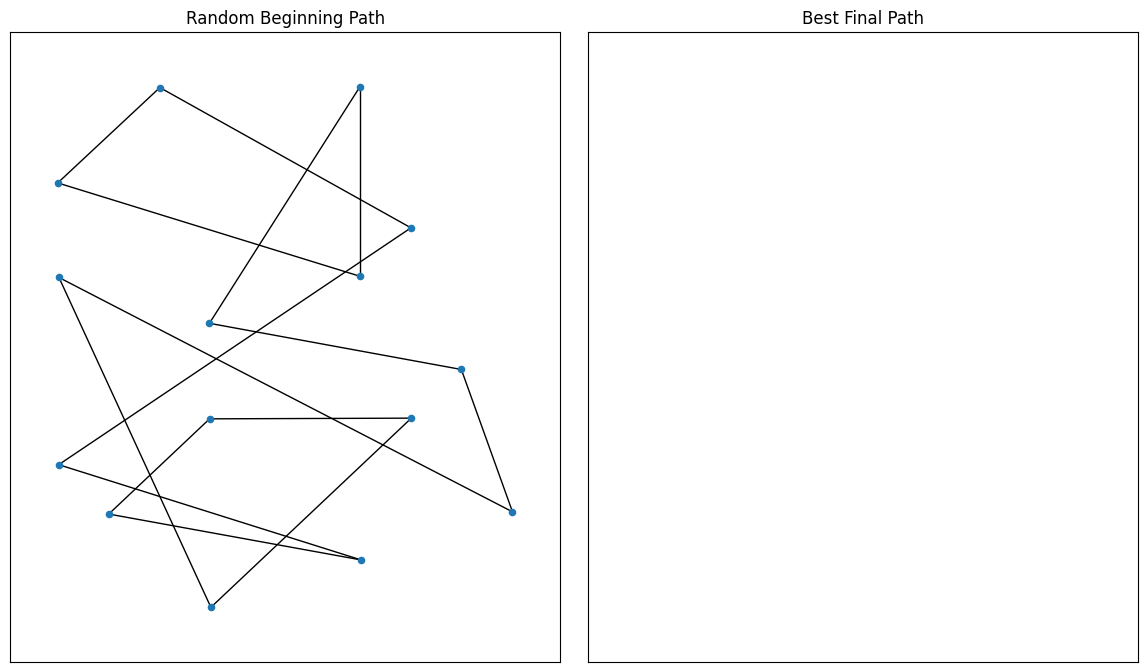

In [34]:
# Sets up the plots to show a random path between the cities and a plot for the best path that was found between them

fig, axs = plt.subplots(1, 2, figsize=(12, 7))
fig.subplots_adjust(left=0.03, bottom=0.05, right=0.97, top=0.95, wspace=0.05)
plt.setp(axs, xticks=[], yticks=[])
axs[0].set_title("Random Beginning Path")
axs[1].set_title("Best Final Path")
Functions.draw_graph(population[0], city_coordinates, axs[0])  # Draw path for one of the random initial permutations

Current run: 1
Run 1: 0%
Run 1: 10%
Run 1: 20%
Run 1: 30%
Run 1: 40%
Run 1: 50%
Run 1: 60%
Run 1: 70%
Run 1: 80%
Run 1: 90%
Current run: 2
Run 2: 0%
Run 2: 10%
Run 2: 20%
Run 2: 30%
Run 2: 40%
Run 2: 50%
Run 2: 60%
Run 2: 70%
Run 2: 80%
Run 2: 90%
Current run: 3
Run 3: 0%
Run 3: 10%
Run 3: 20%
Run 3: 30%
Run 3: 40%
Run 3: 50%
Run 3: 60%
Run 3: 70%
Run 3: 80%
Run 3: 90%
Current run: 4
Run 4: 0%
Run 4: 10%
Run 4: 20%
Run 4: 30%
Run 4: 40%
Run 4: 50%
Run 4: 60%
Run 4: 70%
Run 4: 80%
Run 4: 90%
Current run: 5
Run 5: 0%
Run 5: 10%
Run 5: 20%
Run 5: 30%
Run 5: 40%
Run 5: 50%
Run 5: 60%
Run 5: 70%
Run 5: 80%
Run 5: 90%


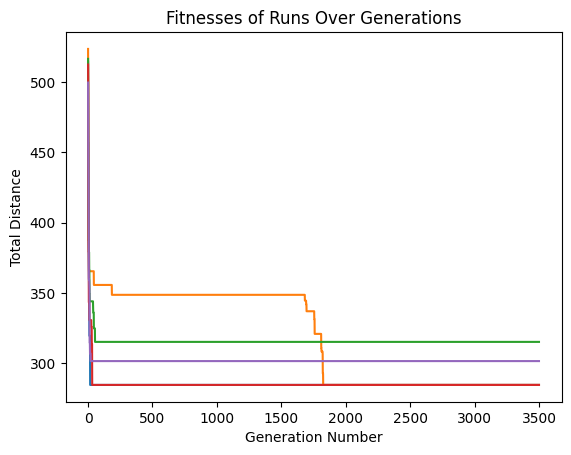

In [35]:
RUN_COUNT = 5

best_path_per_run = []
best_fit_per_run = []


for run in range(RUN_COUNT):
	best_path_over_gens = []
	best_fit_over_gens = []

	print(f"Current run: {run+1}")

	# Already has initial pop for first run to get the previous graph
	if run != 0:
		population = Functions.initialize(num_cities, pop_size)

	# Getting the values from the initial pop (small chance that the best path is found here and gets removed if elitism is off)
	pop_fitness = Functions.fitness_function(distance_matrix, population)
	best_index_gen = pop_fitness.index(min(pop_fitness))
	best_path_over_gens.append(population[best_index_gen])
	best_fit_over_gens.append(pop_fitness[best_index_gen])
	
	for gen in range(gen_size):
		population, pop_fitness = Functions.generation(population, pop_fitness, distance_matrix, mut_chance, cross_chance, selection_size, shuffle_mut=shuffle, additional_pop=additional_pop, elitism=elitism)
		best_index_gen = pop_fitness.index(min(pop_fitness))
		best_path_over_gens.append(population[best_index_gen])
		best_fit_over_gens.append(pop_fitness[best_index_gen])

		if gen % (gen_size * 0.1) == 0:
			print(f"Run {run+1}: {int(gen / gen_size * 100)}%")

	plt.figure("Simple Example")
	plt.title("Fitnesses of Runs Over Generations")
	plt.plot(best_fit_over_gens)
	plt.xlabel("Generation Number")
	plt.ylabel("Total Distance")

	best_index_run = best_fit_over_gens.index(min(best_fit_over_gens))
	best_path_per_run.append(best_path_over_gens[best_index_run])
	best_fit_per_run.append(best_fit_over_gens[best_index_run])

best_index_overall = best_fit_per_run.index(min(best_fit_per_run))
best_fit_overall = best_fit_per_run[best_index_overall]
best_path_overall = best_path_per_run[best_index_overall]


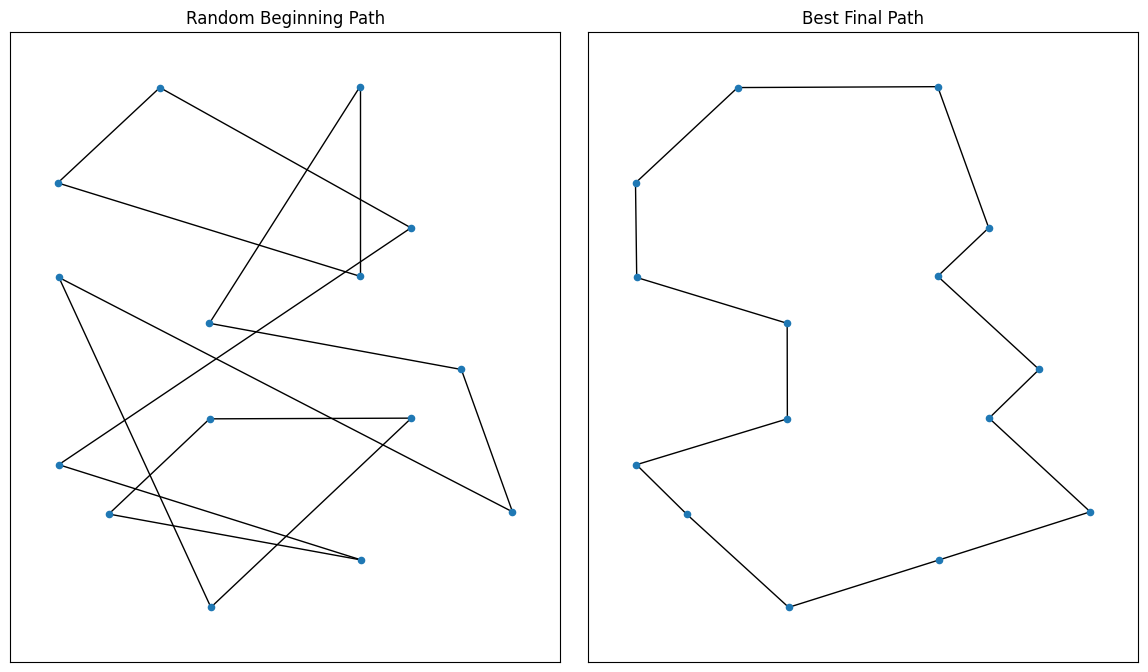

In [36]:
Functions.draw_graph(best_path_overall, city_coordinates, axs[1])  # Draw path for best path found
fig

# Complex Example

This is an example where there are a lot more cities to go to. It shows that when the problem space is super high, this implementation does not guarentee finding an optimal (and maybe not even a really good) solution.

The settings will be slightly changed just to show that they can be

In [21]:
gen_size = 2500
selection_size = 20
mut_chance = 50
cross_chance = 25
shuffle = True
additional_pop = True
elitism = False

In [24]:
# Can be used if the base file is only the distance matrix (not the coordinates of the cities), below it is for when the file has the coordinates of the cities.
# distance_matrix = Functions.open_file_distance_matrix(data_file=FILE_WITH_DIST_MAT)

city_coordinates, num_cities = Functions.read_coordinates_only("CityCoordinates/qa194.tsp", skip_city_num=True, headers=True)
print(f"These are the coordinates for the cities to visit: {city_coordinates}")
print(f"\n There are {num_cities} different cities")
distance_matrix = Functions.calculate_distances(city_coordinates)

These are the coordinates for the cities to visit: [(50840.0, 24748.3333), (51211.9444, 24758.8889), (51394.7222, 24827.2222), (51175.0, 24904.4444), (51548.8889, 24996.1111), (51039.4444, 25010.0), (51275.2778, 25030.8333), (51077.5, 25067.7778), (51516.6667, 25100.0), (51521.6667, 25103.3333), (51218.3333, 25121.9444), (51537.7778, 25150.8333), (51163.6111, 25158.3333), (51220.8333, 25162.2222), (51606.9444, 25167.7778), (51086.3889, 25168.8889), (51269.4444, 25173.8889), (51394.1667, 25210.8333), (51619.1667, 25211.3889), (50807.2222, 25214.1667), (51378.8889, 25214.4444), (51451.6667, 25223.3333), (51174.4444, 25224.1667), (51333.3333, 25233.3333), (51203.0556, 25234.1667), (51330.0, 25235.5556), (51495.5556, 25235.5556), (51428.8889, 25242.7778), (51452.5, 25243.0556), (51559.1667, 25252.5), (51535.2778, 25253.8889), (51549.7222, 25253.8889), (51398.8889, 25256.9444), (51516.3889, 25263.6111), (51545.2778, 25265.8333), (50969.1667, 25266.6667), (51483.3333, 25266.6667), (51532.777

In [25]:
# Makes {pop_size} random paths between each of the cities (each city gets visited once in a path)
pop_size = 201
population = Functions.initialize(num_cities=num_cities, pop_size=pop_size)

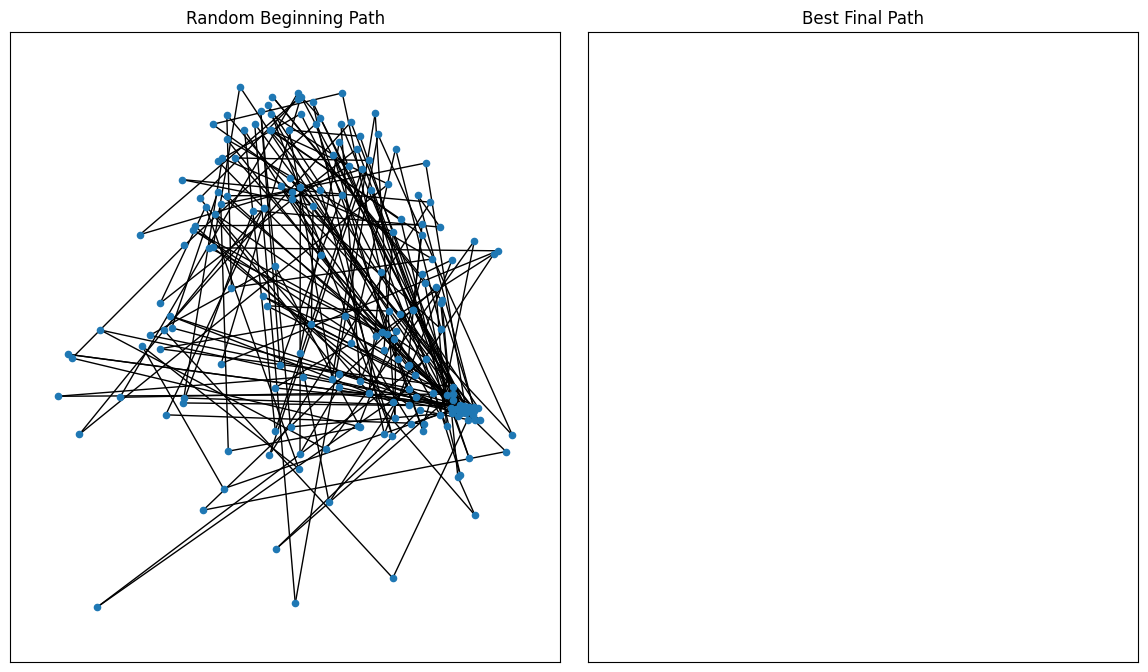

In [26]:
# Sets up the plots to show a random path between the cities and a plot for the best path that was found between them

fig2, axs2 = plt.subplots(1, 2, figsize=(12, 7))
fig2.subplots_adjust(left=0.03, bottom=0.05, right=0.97, top=0.95, wspace=0.05)
plt.setp(axs2, xticks=[], yticks=[])
axs2[0].set_title("Random Beginning Path")
axs2[1].set_title("Best Final Path")
Functions.draw_graph(population[0], city_coordinates, axs2[0])  # Draw path for one of the random initial permutations

Current run: 1
Run 1: 0%
Run 1: 10%
Run 1: 20%
Run 1: 30%
Run 1: 40%
Run 1: 50%
Run 1: 60%
Run 1: 70%
Run 1: 80%
Run 1: 90%
Current run: 2
Run 2: 0%
Run 2: 10%
Run 2: 20%
Run 2: 30%
Run 2: 40%
Run 2: 50%
Run 2: 60%
Run 2: 70%
Run 2: 80%
Run 2: 90%
Current run: 3
Run 3: 0%
Run 3: 10%
Run 3: 20%
Run 3: 30%
Run 3: 40%
Run 3: 50%
Run 3: 60%
Run 3: 70%
Run 3: 80%
Run 3: 90%
Current run: 4
Run 4: 0%
Run 4: 10%
Run 4: 20%
Run 4: 30%
Run 4: 40%
Run 4: 50%
Run 4: 60%
Run 4: 70%
Run 4: 80%
Run 4: 90%
Current run: 5
Run 5: 0%
Run 5: 10%
Run 5: 20%
Run 5: 30%
Run 5: 40%
Run 5: 50%
Run 5: 60%
Run 5: 70%
Run 5: 80%
Run 5: 90%
Current run: 6
Run 6: 0%
Run 6: 10%
Run 6: 20%
Run 6: 30%
Run 6: 40%
Run 6: 50%
Run 6: 60%
Run 6: 70%
Run 6: 80%
Run 6: 90%
Current run: 7
Run 7: 0%
Run 7: 10%
Run 7: 20%
Run 7: 30%
Run 7: 40%
Run 7: 50%
Run 7: 60%
Run 7: 70%
Run 7: 80%
Run 7: 90%
Current run: 8
Run 8: 0%
Run 8: 10%
Run 8: 20%
Run 8: 30%
Run 8: 40%
Run 8: 50%
Run 8: 60%
Run 8: 70%
Run 8: 80%
Run 8: 90%
Current 

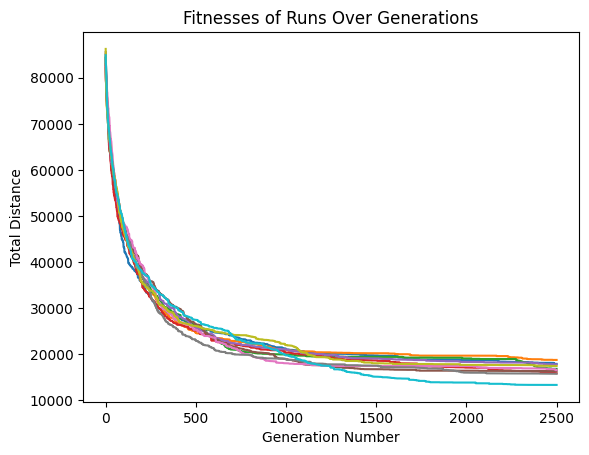

In [27]:
RUN_COUNT = 10

best_path_per_run = []
best_fit_per_run = []


for run in range(RUN_COUNT):
	best_path_over_gens = []
	best_fit_over_gens = []

	print(f"Current run: {run+1}")

	# Already has initial pop for first run to get the previous graph
	if run != 0:
		population = Functions.initialize(num_cities, pop_size)

	# Getting the values from the initial pop (small chance that the best path is found here and gets removed if elitism is off)
	pop_fitness = Functions.fitness_function(distance_matrix, population)
	best_index_gen = pop_fitness.index(min(pop_fitness))
	best_path_over_gens.append(population[best_index_gen])
	best_fit_over_gens.append(pop_fitness[best_index_gen])
	
	for gen in range(gen_size):
		population, pop_fitness = Functions.generation(population, pop_fitness, distance_matrix, mut_chance, cross_chance, selection_size, shuffle_mut=shuffle, additional_pop=additional_pop, elitism=elitism)
		best_index_gen = pop_fitness.index(min(pop_fitness))
		best_path_over_gens.append(population[best_index_gen])
		best_fit_over_gens.append(pop_fitness[best_index_gen])

		if gen % (gen_size * 0.1) == 0:
			print(f"Run {run+1}: {int(gen / gen_size * 100)}%")

	plt.figure("Complex Example")
	plt.title("Fitnesses of Runs Over Generations")
	plt.plot(best_fit_over_gens)
	plt.xlabel("Generation Number")
	plt.ylabel("Total Distance")
	
	best_index_run = best_fit_over_gens.index(min(best_fit_over_gens))
	best_path_per_run.append(best_path_over_gens[best_index_run])
	best_fit_per_run.append(best_fit_over_gens[best_index_run])

best_index_overall = best_fit_per_run.index(min(best_fit_per_run))
best_fit_overall = best_fit_per_run[best_index_overall]
best_path_overall = best_path_per_run[best_index_overall]

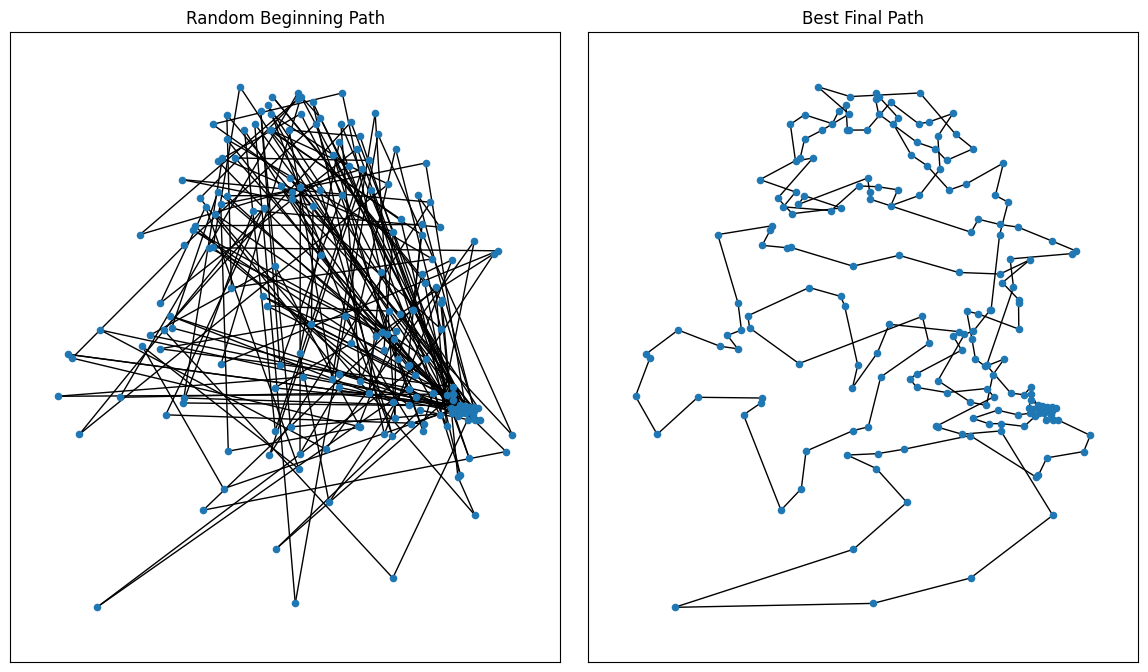

In [28]:
Functions.draw_graph(best_path_overall, city_coordinates, axs2[1])  # Draw path for best path found
fig2

Just by looking at the resulting, best path that was found, it is very clearly not the optimal one. If it was, there would likely be no intersecting lines between the cities.

However, when compared against the random path, it is a lot better of a path.